# Wireless Indoor Localization classification Problem 

### Loading Libraries

In [1]:
# Warning
import warnings
warnings.filterwarnings("ignore")

# for Data
import pandas as pd
import numpy as np
import math

# Visualization
import matplotlib.pyplot as plt
import seaborn as sns
import matplotlib.cm
from pandas.tools.plotting import scatter_matrix
from matplotlib import cm
sns.set_style(style='whitegrid')
sns.set(font_scale=1.5);
%matplotlib inline


# Splitting
from sklearn.model_selection import train_test_split


# Models
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import AdaBoostClassifier
from sklearn import svm

# Metrics
from sklearn.metrics import fbeta_score, accuracy_score, make_scorer, classification_report
from sklearn.metrics import confusion_matrix, roc_curve, roc_auc_score
from sklearn.model_selection import GridSearchCV, cross_val_score



C:\ProgramData\Anaconda3\lib\site-packages\sklearn\ensemble\weight_boosting.py:29: DeprecationWarning: numpy.core.umath_tests is an internal NumPy module and should not be imported. It will be removed in a future NumPy release.
  from numpy.core.umath_tests import inner1d


### Importing Dataset

In [2]:
data = pd.read_csv('G:\ML COURSE PROJECTS AND DOCS\machine-learning-master\projects\wifi_localization.csv') #read data file


### Data Exploration 

In [3]:
data.head()
data.describe()

,C1,C2,C3,C4,C5,C6,C7,Room
count,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000
mean,-52.330500,-55.623500,-54.964000,-53.566500,-62.640500,-80.985000,-81.726500,2.500000
std,11.321677,3.417688,5.316186,11.471982,9.105093,6.516672,6.519812,1.118314
min,-74.000000,-74.000000,-73.000000,-77.000000,-89.000000,-97.000000,-98.000000,1.000000
25%,-61.000000,-58.000000,-58.000000,-63.000000,-69.000000,-86.000000,-87.000000,1.750000
50%,-55.000000,-56.000000,-55.000000,-56.000000,-64.000000,-82.000000,-83.000000,2.500000
75%,-46.000000,-53.000000,-51.000000,-46.000000,-56.000000,-77.000000,-78.000000,3.250000
max,-10.000000,-45.000000,-40.000000,-11.000000,-36.000000,-61.000000,-63.000000,4.000000


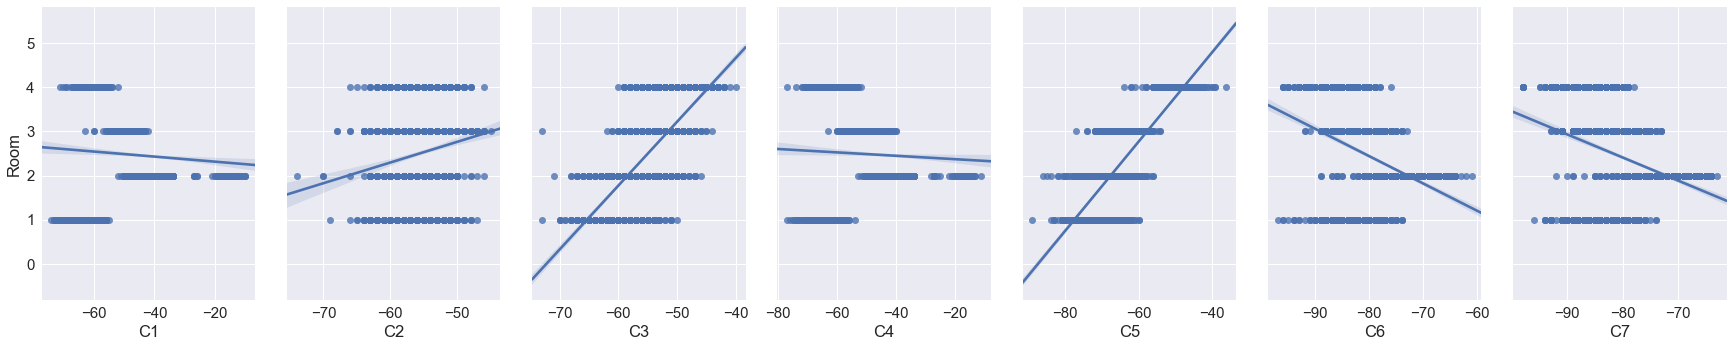

In [4]:
sns.pairplot(data,x_vars=['C1','C2','C3','C4','C5','C6','C7'], y_vars='Room',size=5,aspect=0.7, kind='reg')

In [5]:
mean_Room = np.mean(data.Room)
std_Room = np.std(data.Room)
print(mean_Room)
print(std_Room)


2.5
1.118033988749895


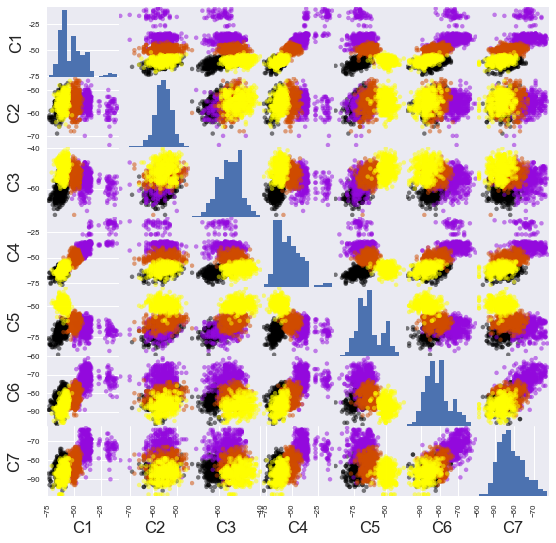

In [6]:
feature_names = ['C1','C2','C3','C4', 'C5', 'C6', 'C7']
X = data[feature_names]
y = data['Room']
cmap = cm.get_cmap('gnuplot')
scatter = pd.scatter_matrix(X, c = y, marker = 'o', s=20, hist_kwds={'bins':15}, figsize=(9,9), cmap = cmap)
plt.savefig('WIFI_scatter_matrix')

## Preparing the Data

In [7]:
#dataset = data.drop(['C1', 'C2', 'C4', 'C2','Room'], axis=1)
dataset = data.drop(['Room'], axis=1)
#dataset=data
X=dataset
y=data.Room
print(X.head())
print(y.head())

   C1  C2  C3  C4  C5  C6  C7
0 -64 -56 -61 -66 -71 -82 -81
1 -68 -57 -61 -65 -71 -85 -85
2 -63 -60 -60 -67 -76 -85 -84
3 -61 -60 -68 -62 -77 -90 -80
4 -63 -65 -60 -63 -77 -81 -87
0    1
1    1
2    1
3    1
4    1
Name: Room, dtype: int64


### Spliting The Dataset

In [8]:
X_train , X_test , y_train , y_test = train_test_split(X,y,test_size=0.25, random_state=2)

# Building The Benchmark Model

### Logistic Regression 

In [9]:
LR = LogisticRegression() # build logitstic regression model
LR.fit(X_train,y_train) # fit the model
y_pred = LR.predict(X_test) # predict new lable 
print("accuracy_score :",accuracy_score(y_test, y_pred)) # print out accuracy score
print (classification_report(y_test, y_pred)) # print out classification report

accuracy_score : 0.966
             precision    recall  f1-score   support

          1       0.99      0.98      0.98       127
          2       0.92      0.98      0.95       102
          3       0.94      0.92      0.93       129
          4       1.00      0.99      0.99       142

avg / total       0.97      0.97      0.97       500



### Confusion matrix 

<function matplotlib.pyplot.show(*args, **kw)>

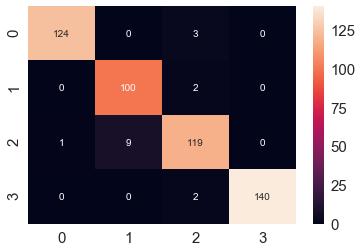

In [10]:
lr_conf = confusion_matrix(y_test, y_pred) # make a confusin matrix 
sns.heatmap(lr_conf, annot=True, fmt="d") 
plt.show # plot confusion matrix heatmap 

# Building and Evaluating models

### Random Forest Classifier

In [11]:
RF = RandomForestClassifier(random_state=42) # build a random forst model
RF.fit(X_train,y_train) # fit the model
predicted_label = RF.predict(X_test) # predict new data lable
print("accuracy_score :",accuracy_score(y_test, predicted_label)) # print out accuracy score
report = classification_report(y_test, predicted_label) 
print(report)# print put classification report

accuracy_score : 0.98
             precision    recall  f1-score   support

          1       0.99      1.00      1.00       127
          2       0.95      0.97      0.96       102
          3       0.97      0.96      0.96       129
          4       1.00      0.99      0.99       142

avg / total       0.98      0.98      0.98       500



<function matplotlib.pyplot.show(*args, **kw)>

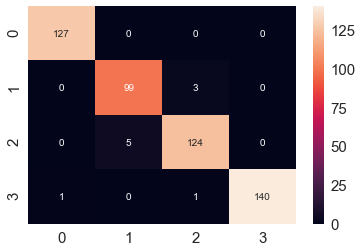

In [12]:
RF_conf = confusion_matrix(y_test, predicted_label) 
sns.heatmap(RF_conf, annot=True, fmt="d")
plt.show

### Support vector machine

In [13]:
SVMc = svm.SVC(gamma='auto',kernel='rbf')
SVMc.fit(X_train, y_train)
predicted_label_1=SVMc.predict(X_test)
print("accuracy_score :",accuracy_score(y_test, predicted_label_1))
report = classification_report(y_test, predicted_label_1)
print(report)

accuracy_score : 0.73
             precision    recall  f1-score   support

          1       1.00      0.78      0.88       127
          2       0.43      1.00      0.60       102
          3       1.00      0.59      0.74       129
          4       1.00      0.62      0.77       142

avg / total       0.88      0.73      0.75       500



<function matplotlib.pyplot.show(*args, **kw)>

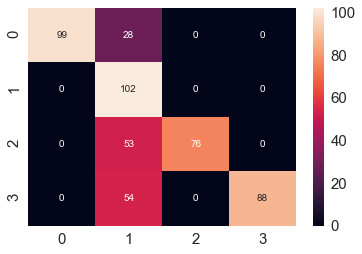

In [14]:
SVMc_conf = confusion_matrix(y_test, predicted_label_1)
sns.heatmap(SVMc_conf, annot=True, fmt="d")
plt.show

### Adaboost

In [15]:
Adc = AdaBoostClassifier()
Adc.fit(X_train,y_train)
predicted_label_2=Adc.predict(X_test)
print("accuracy_score :",accuracy_score(y_test,predicted_label_2))
report = classification_report(y_test, predicted_label_2)
print(report)

accuracy_score : 0.954
             precision    recall  f1-score   support

          1       0.98      1.00      0.99       127
          2       0.92      0.91      0.92       102
          3       0.91      0.94      0.92       129
          4       1.00      0.96      0.98       142

avg / total       0.95      0.95      0.95       500



<function matplotlib.pyplot.show(*args, **kw)>

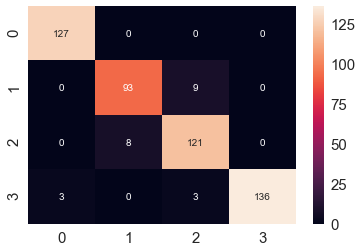

In [16]:
Adc_conf = confusion_matrix(y_test, predicted_label_2)
sns.heatmap(Adc_conf, annot=True, fmt="d")
plt.show

# Validating Model

#### Random Forest Classifier is the best model with at least type I error of 5 and accuracy score 98% 
#### in our problem type I error ( false pos) is when the location is correct, but the model classified it wrong  

In [17]:
parameters = {
    'n_estimators': [10, 20, 100],
    'criterion': ['gini', 'entropy'],
    'min_samples_split': [2,5,10],
    'min_samples_leaf': [1, 5, 10],
     # change RF model parameters for better accuracy 
}
grid_obj = GridSearchCV(RF, param_grid=parameters, scoring='accuracy', cv=10)
grid_fit = grid_obj.fit(X_train, y_train)
best_clf = grid_fit.best_estimator_

In [18]:
best_predictions = best_clf.predict(X_test)
tuned_scores = cross_val_score(best_clf, X, y, cv=10, scoring='accuracy')
print(tuned_scores.mean())

0.9754999999999999


In [19]:
print("Best 'RandomForestClassifier' parameters values after tuning:")
display(pd.DataFrame(grid_obj.best_params_, index=['best parameters values']))


Best 'RandomForestClassifier' parameters values after tuning:


,criterion,min_samples_leaf,min_samples_split,n_estimators
best parameters values,gini,1,5,20


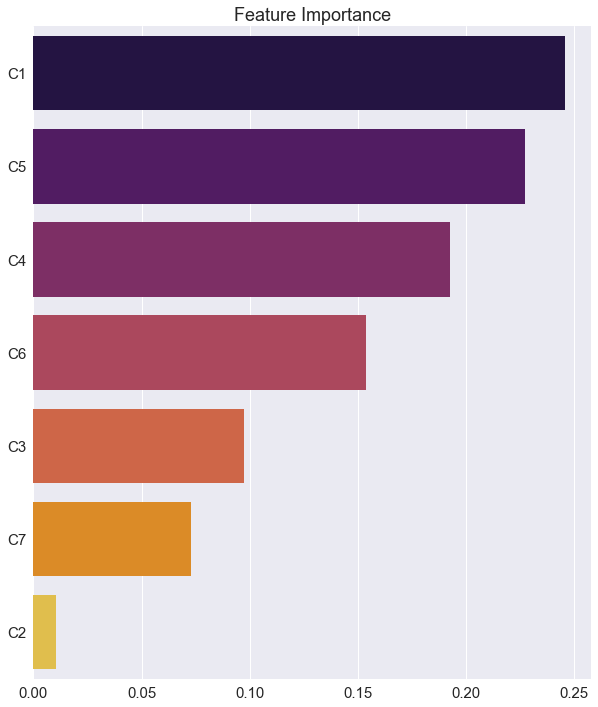

In [20]:
plt.figure(figsize=(10,12))
plt.title("Feature Importance")
imp = pd.Series(data=best_clf.feature_importances_, index=X_train.columns).sort_values(ascending=False)[:10]
ax = sns.barplot(y=imp.index, x=imp.values, palette="inferno", orient='h')